## Radar Raingage Intercomparisons

In [1]:
%matplotlib inline
import matplotlib as mpl
from raingage import *
from event import Event

**Philadelphia: **

In [ ]:
path = "C:/Users/Julia/Google Drive/PHILADELPHIA/"

rg = RainGage(path=path, df_file="Philadelphia_raingage_1996_2015_NAN_filled_time_indexed.dat")
rad = RainGage(path=path, name="Phila_gage_{YEAR}_fill.dat", year=range(2003,2015))

**St. Louis: **

In [2]:
path = 'C:/Users/Julia/Google Drive/STLOUIS/'

rg = RainGage(path=path, name='StLouis_gage_{YEAR}.dat', year=range(2009, 2015), ngages=100, units='in')
rad = RainGage(path=path, name='StLouis_radar_{YEAR}.dat', year=range(2009, 2015), ngages=100, units='mm')
rg.set_lat_lon_file('ll_loc{YEAR}.txt'.format(YEAR=rg.year))

### Let's Explore!

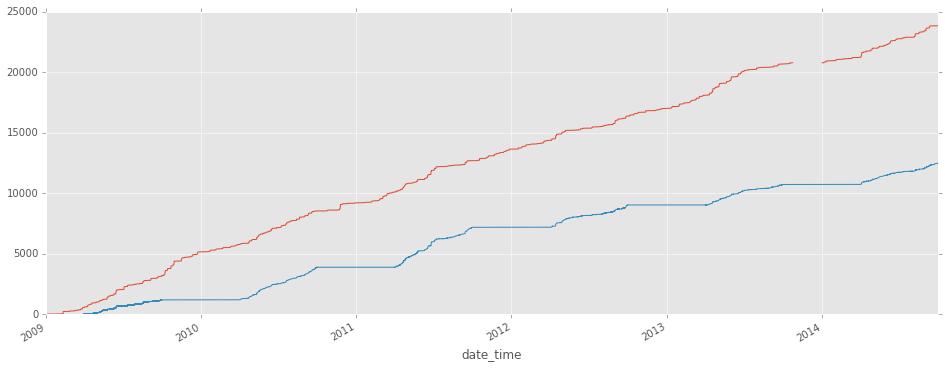

In [4]:
rg.rate.mean(axis=1).cumsum().plot(figsize=(16,6))
rad.rate.mean(axis=1).cumsum().plot(figsize=(16,6))
plt.show()

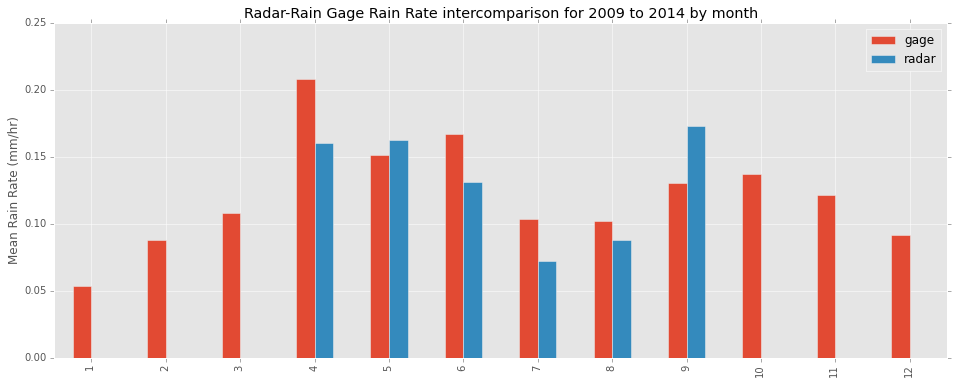

In [51]:
title = 'Radar-Rain Gage Rain Rate intercomparison for {YEAR} by month'.format(YEAR=rg.year)

df = pd.DataFrame({'gage': rg.rate.mean(axis=1).groupby(rg.df.index.month).mean()})
df = df.join(pd.DataFrame({'radar': rad.rate.mean(axis=1).groupby(rad.df.index.month).mean()}))
df.plot(kind='bar', figsize=(16,6))
plt.ylabel('Mean Rain Rate (mm/hr)')
plt.title(title)
plt.savefig('./output/StLouis/{title}.jpg'.format(title=title))
plt.show()

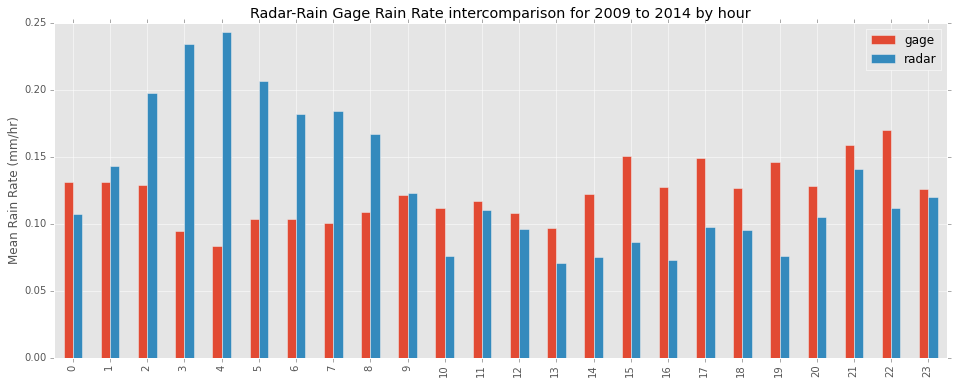

In [52]:
title = 'Radar-Rain Gage Rain Rate intercomparison for {YEAR} by hour'.format(YEAR=rg.year)

df = pd.DataFrame({'gage': rg.rate.mean(axis=1).groupby(rg.df.index.hour).mean()})
df = df.join(pd.DataFrame({'radar': rad.rate.mean(axis=1).groupby(rad.df.index.hour).mean()}))
df.plot(kind='bar', figsize=(16,6))
plt.ylabel('Mean Rain Rate (mm/hr)')
plt.title(title)
plt.savefig('./output/StLouis/{title}.jpg'.format(title=title))
plt.show()

Choose you threshold carefully. You will notice that it makes a big difference in the results

In [7]:
rg.thresh = rad.thresh = .254
rg.get_wet()
rad.get_wet()

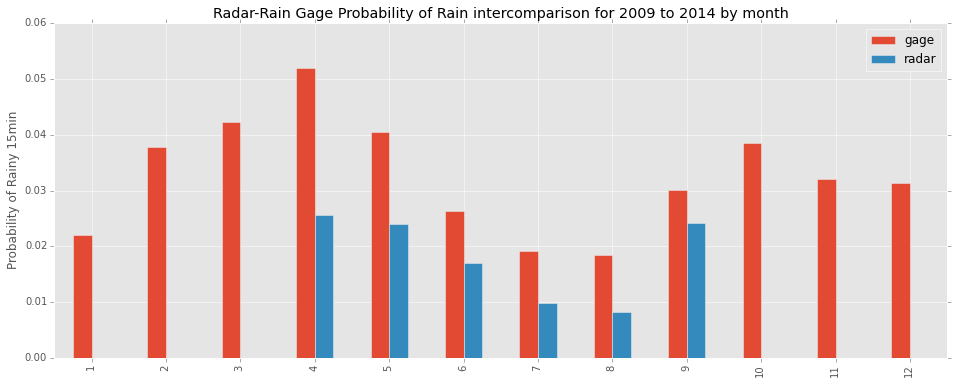

In [53]:
title = 'Radar-Rain Gage Probability of Rain intercomparison for {YEAR} by month'.format(YEAR=rg.year)

df = pd.DataFrame({'gage': rg.wet.mean(axis=1).groupby(rg.wet.index.month).mean()})
df = df.join(pd.DataFrame({'radar': rad.wet.mean(axis=1).groupby(rad.wet.index.month).mean()}))
df.plot(kind='bar', figsize=(16,6))
plt.ylabel('Probability of Rainy 15min')
plt.title(title)
plt.savefig('./output/StLouis/{title}.jpg'.format(title=title))
plt.show()

### Plot the rainfall in space using shaded points

In [35]:
bar = rad.rate.resample('24H', base=12, how='mean', closed='right', label='right').mean(axis=1)
foo = rg.rate.resample('24H', base=12, how='mean', closed='right', label='right').mean(axis=1)

date_time
2012-09-26 12:00:00    1.442996
2011-06-18 12:00:00    1.462029
2012-04-14 12:00:00    1.595150
2009-06-16 12:00:00    1.603299
2011-06-26 12:00:00    2.396208
dtype: float64

In [36]:
df = pd.DataFrame({'radar': bar}).join(pd.DataFrame({'gage':foo}))

In [49]:
df.dropna().sort_values('gage').tail(5)

,radar,gage
date_time,,
2012-04-14 12:00:00,1.595150,2.116453
2012-09-01 12:00:00,1.148383,2.237573
2009-07-04 12:00:00,0.000105,2.284413
2013-04-18 12:00:00,0.258242,2.308119
2011-06-26 12:00:00,2.396208,2.810616


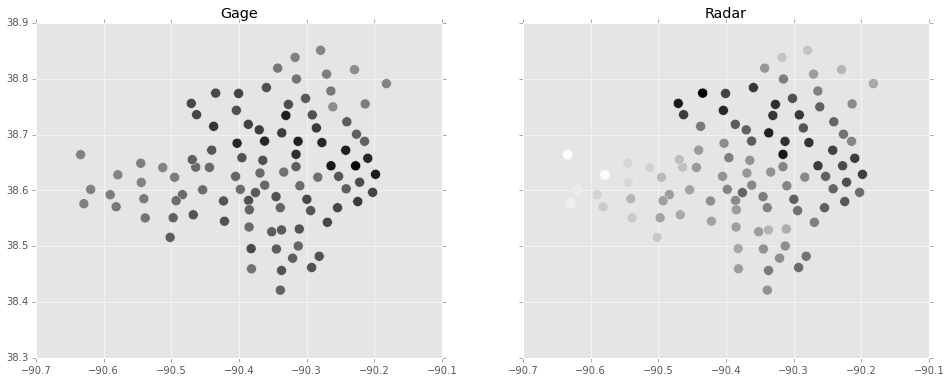

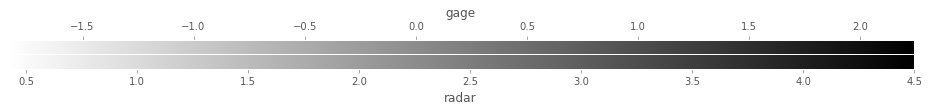

In [47]:
storm = Event(rg, rad, '2011-06-26')

rg.set_lat_lon_file('ll_loc{YEAR}.txt'.format(YEAR=2011))
rg.get_RG_lon_lat(cols=['lat','lon'])
rad.RG_lon_lat = rg.RG_lon_lat

storm.map_event()

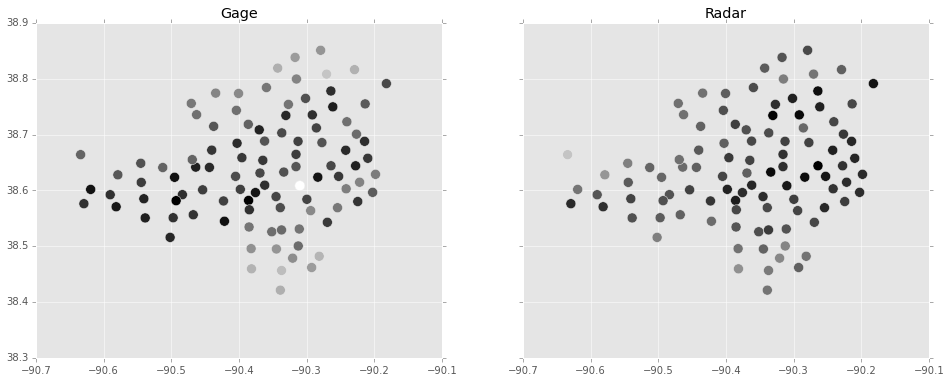

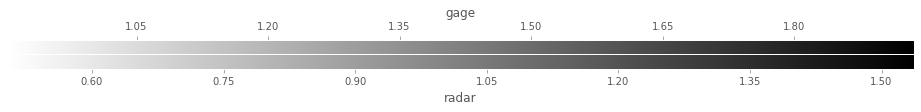

In [48]:
storm = Event(rg, rad, '2012-04-14')

rg.set_lat_lon_file('ll_loc{YEAR}.txt'.format(YEAR=2012))
rg.get_RG_lon_lat(cols=['lat','lon'])
rad.RG_lon_lat = rg.RG_lon_lat

storm.map_event()